In [2]:
%matplotlib inline
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt
import random

2.3.0


In [17]:
num_inputs=2
num_examples=1000
fecture_true=[9,2]
b_true=2.1
features=tf.random.normal((num_examples,num_inputs),stddev=1.0)
labels=features[:,0]*fecture_true[0]+features[:,1]*fecture_true[1]+b_true
labels+=tf.random.normal(labels.shape,stddev=0.01)

In [18]:
print(features[0],labels[0])

tf.Tensor([-0.7534533  0.5714622], shape=(2,), dtype=float32) tf.Tensor(-3.5268826, shape=(), dtype=float32)


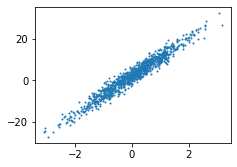

In [19]:
def set_figsize(figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:,0], labels, 1)

In [26]:
def data_iter(batchsize,features,labels):
    num_examples=len(features)
    indeics=list(range(num_examples))
    random.shuffle(indeics)
    for i in range(0,num_examples,batchsize):
        j=indeics[i:min(num_examples,i+batchsize)]
        yield tf.gather(features,axis=0,indices=j),tf.gather(labels,axis=0,indices =j)

In [27]:
batchsize=10
for x,y in data_iter(batchsize,features,labels):
    print(x,y)
    break

tf.Tensor(
[[ 0.2635311  -1.4295274 ]
 [ 0.2818123   0.62539995]
 [-0.40914607  0.2489844 ]
 [-0.7071993   1.2519915 ]
 [ 1.9165893   0.5637184 ]
 [-0.17017606  0.6126022 ]
 [ 0.61978114 -0.42497185]
 [-0.52479064  0.9005    ]
 [ 0.01098765 -1.9145757 ]
 [-3.0425913   1.2475793 ]], shape=(10, 2), dtype=float32) tf.Tensor(
[  1.611297     5.8748164   -1.1060289   -1.7584549   20.490856
   1.7910223    6.8098364   -0.83133674  -1.6344588  -22.778645  ], shape=(10,), dtype=float32)


In [28]:
w=tf.Variable(tf.random.normal((num_inputs,1),stddev=0.01))
b=tf.Variable(tf.zeros((1,)))

In [29]:
def liner_func(x,w,b):
    return tf.matmul(x,w)+b

In [30]:
def squared_loss(y_,y):
    return (y_-tf.reshape(y,y_.shape))**2/2

In [31]:
def sgd(params, lr, batch_size, grads):
    """Mini-batch stochastic gradient descent."""
    for i, param in enumerate(params):
        param.assign_sub(lr * grads[i] / batch_size)

In [34]:
lr = 0.03
num_epochs = 3
net = liner_func
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batchsize, features, labels):
        with tf.GradientTape() as t:
            t.watch([w,b])
            l = tf.reduce_sum(loss(net(X, w, b), y))
        grads = t.gradient(l, [w, b])
        sgd([w, b], lr, batchsize, grads)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))

epoch 1, loss 0.113762
epoch 2, loss 0.000361
epoch 3, loss 0.000048


In [35]:
print(fecture_true,w)

[9, 2] <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[8.998634 ],
       [1.9999012]], dtype=float32)>


In [36]:
print(b_true,b)

2.1 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.098986], dtype=float32)>
